# Thresholding, Binarization & Adaptive Thresholding

In this kernel, we're gonna cover:
1. Binarized Images
2. Thresholding Methods
3. Adaptive Thresholding
4. Skimage's Threshold Local

In [1]:
# Import dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-30 10:08:50--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.154
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.8MB/s    in 1.6s    

2022-08-30 10:08:52 (17.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Thresholding Methods

We're gonna see these methods below:
* **cv2.THRESH_BINARY** - Values below 127 go to 0 (black), everything above goes to 255 (white)
* **cv2.THRESH_BINARY_INV** - Values below 127 go to 255 (white) and values above 127 go to 0 (reverse of `cv2.THREST_BINARY`)
* **cv2.THRESH_TRUNC** - Values above 127 are truncated (held) at 127 (the 255 argument is unused) 
* **cv2.THRESH_TOZERO** - Values below 127 go to 0 and values above 127 are unchanged.
* **cv2.THRESH_TOZERO_INV** - Values below 127 is unchanged and values above 127 go to 0 (reverse of `cv2.THREST_TOZERO`)

To dive in: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

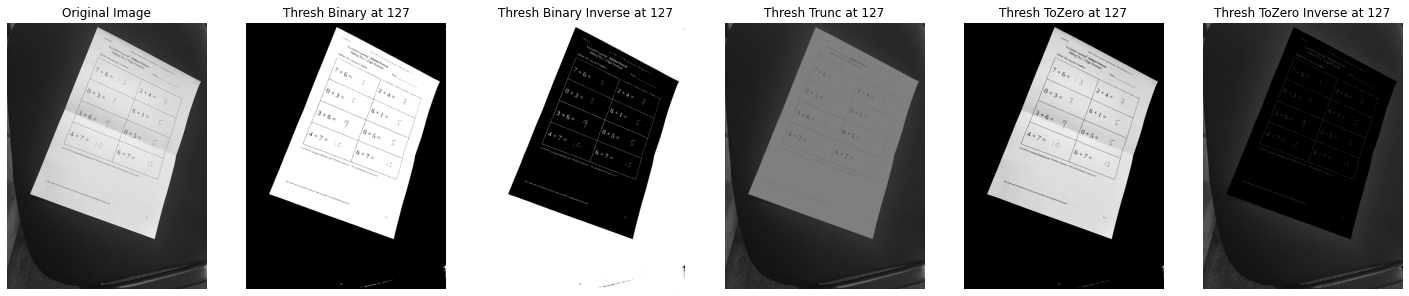

In [3]:
# Load our image in greyscale
image = cv2.imread('images/scan.jpg', 0)

# Use cv2.THRESH_BINARY as a threshold
ret, thresh_binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Use cv2.THRESH_BINARY_INV as a threshold
ret, thresh_binary_inv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Use cv2.THRESH_TRUNC as a threshold
ret, thresh_trunc = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)

# Use cv2.THRESH_TOZERO as a threshold
ret, thresh_tozero = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)

# Use cv2.THRESH_TOZERO_INV as a threshold
ret, thresh_tozero_inv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

# Let's plot them and see the differences
# Original Image
plt.figure(figsize = (25, 15))
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis(False)

# cv2.THRESH_BINARY
plt.subplot(1, 6, 2)
plt.imshow(cv2.cvtColor(thresh_binary, cv2.COLOR_BGR2RGB))
plt.title('Thresh Binary at 127')
plt.axis(False)

# cv2.THRESH_BINARY_INV
plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(thresh_binary_inv, cv2.COLOR_BGR2RGB))
plt.title('Thresh Binary Inverse at 127')
plt.axis(False)

# cv2.THRESH_TRUNC
plt.subplot(1, 6, 4)
plt.imshow(cv2.cvtColor(thresh_trunc, cv2.COLOR_BGR2RGB))
plt.title('Thresh Trunc at 127')
plt.axis(False)

# cv2.THRESH_TOZERO
plt.subplot(1, 6, 5)
plt.imshow(cv2.cvtColor(thresh_tozero, cv2.COLOR_BGR2RGB))
plt.title('Thresh ToZero at 127')
plt.axis(False)

# cv2.THRESH_TOZERO_INV
plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(thresh_tozero_inv, cv2.COLOR_BGR2RGB))
plt.title('Thresh ToZero Inverse at 127')
plt.axis(False);

> 🔑**Note**: Instead of writing too much code for plotting the results we could follow two ways:

1. Create a function (we've done before)
2. Create for loop 

We've created a function called `imshow` before, let's just look at creating a for loop to plot our images in a much easier way. 

Before we create our for loop we need to store the titles of our images and name of images in two different lists.

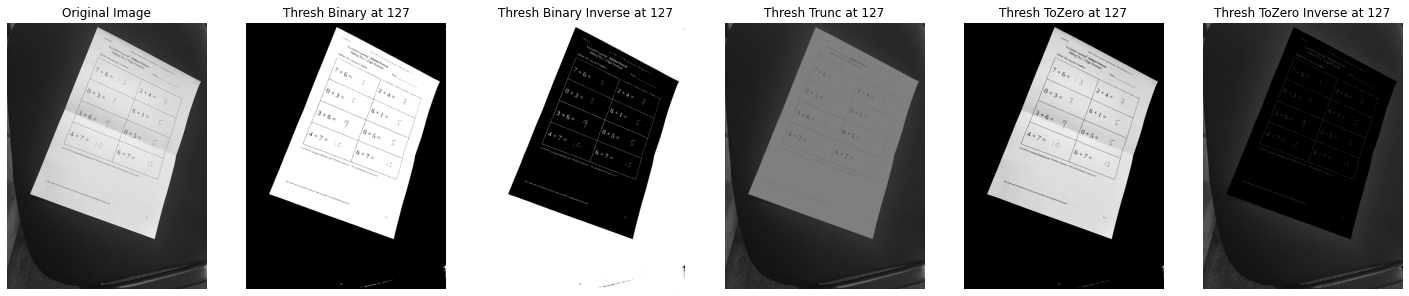

In [4]:
# Create a list of images
images = [image, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

# Create a list of titles
titles = ['Original Image', 'Thresh Binary at 127', 'Thresh Binary Inverse at 127', 'Thresh Trunc at 127', 'Thresh ToZero at 127', 'Thresh ToZero Inverse at 127']

# Let's create the for loop
plt.figure(figsize = (25, 15))
for i in range(len(images)):
  plt.subplot(1, 6, i+1)
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt.title(titles[i])
  plt.axis(False);

## Adaptive Thresholding 

If we want to calculate the threshold automatically, we can use these below:
1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU


> `cv2.adaptiveThreshold` Parameters:
* **src** - Source 8-bit single-channel image.
* **dst** - Destination image of the same size and the same type as src.
* **maxValue** - Non-zero value assigned to the pixels for which the contidion is satisfied.
* **adaptiveMethod** - Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C.
* **thresholdType** - Thresholding type must be either THRESH_BINARY or THRESH_BINARY_INV.
* **blockSize** - Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7 and so on.
* **C** - Constant subtracted from the mean or weighted mean. Normally, it's positive but may be zero or negative as well.

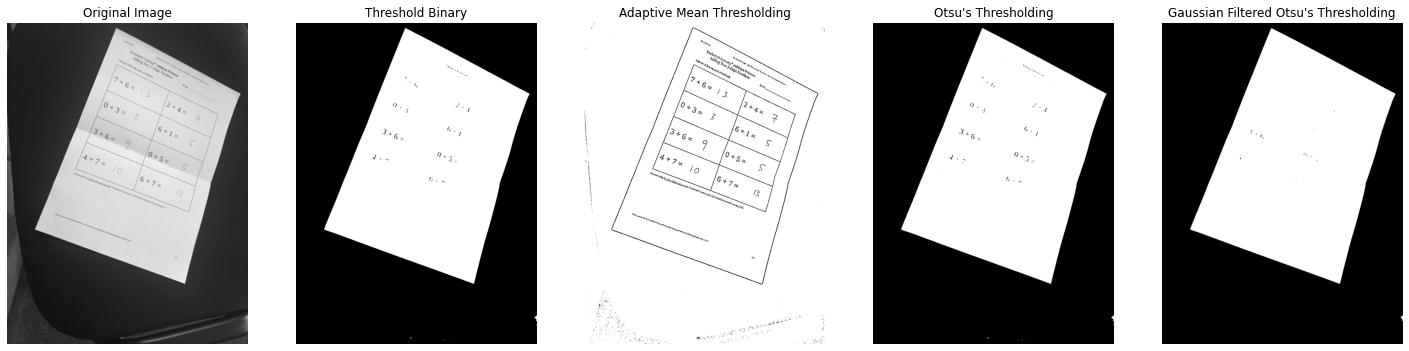

In [5]:
# Load an image in grayscale
image = cv2.imread('images/scan.jpg', 0)

# It's good to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Use cv2.THRESHBINARY and cv2.adaptiveThreshold to see the differences
ret, thresh_binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
ret, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
gaussian_filter = cv2.GaussianBlur(image, (5, 5), 0)
ret, blurred_otsu_thresh = cv2.threshold(gaussian_filter, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Let's check the differences by plotting them using for loop
# Create the lists
images = [image, thresh_binary, adaptive_thresh, otsu_thresh, blurred_otsu_thresh]
titles = ['Original Image', 'Threshold Binary', 'Adaptive Mean Thresholding', "Otsu's Thresholding", "Gaussian Filtered Otsu's Thresholding"]

# Create the figure
plt.figure(figsize = (25, 15))

# Create the for loop
for i in range(len(images)):
  plt.subplot(1, 5, i + 1)
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt.title(titles[i])
  plt.axis(False);

## Skimage Threshold Local

The **threshold_local** function, calculates thresholds in regions with a characteristic size **block_size** surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an **offset** value.

To find out more: https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

`threshold_local(image, block_size, offset = 10)`

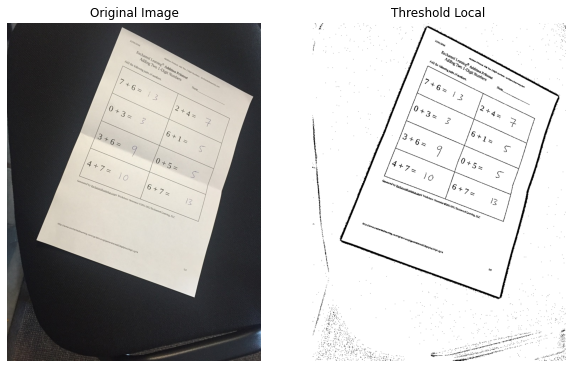

In [6]:
# Import threshold_local from skimage
from skimage.filters import threshold_local

# Load our image
image = cv2.imread('images/scan.jpg')

# We need to get the value component from the HSV color space
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset = 15, method = 'gaussian')

# Apply the threshold operation
thresh = (V > T).astype('uint8') * 255

# Show the images
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title('Threshold Local')
plt.axis(False);